# Implementing regression using Python libraries.
We will now look at some python libraries that implements linear regression for us. As we've seen, our manual regression does not include polynomial terms (although this would just be a new column so easy to do) nor do we implement lasso or ridge regression.
<br><br>

One of the most popular ML packages in Python is `scikit-learn`, which is built on Numpy. If we need more functionality beyond what scikit can provide then we should look at `statsmodels`.

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Simple Linear Regression
Our 3 main methods are:
* model.`fit`(x,y)
* model.`score`(x,y)
* model.`predict`(x)

We first create some dummy data

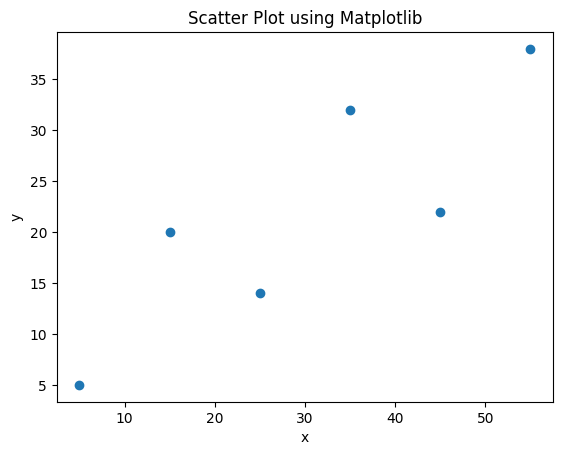

(6, 1)
(6,)


In [31]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) #To get one column and any number of rows
y = np.array([5, 20, 14, 32, 22, 38])
plt.scatter(x.flatten(), y)
plt.title('Scatter Plot using Matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(x.shape)
print(y.shape)


Create an instance of the LinearRegression class. We can pass it several parameters, if needed:
<br>
* `fit_intercept` is a Bool. True (default) = model will calculate intercept (B0). False = B0 will be 0.
* `normalize`. If True will normalize values. If False (default) no normalization will be done.
* `copy_X`. If True (default) it will copy input variables. If False it will overwrite them.
* `n_jobs` are the number of jobs to run in parallel. Default is None i.e. one job.

In [10]:
model = LinearRegression()
model = model.fit(x,y) #Will return itself
model

LinearRegression()

Once we have fitted the model, we can go ahead and check the results. We can get *R*<sup>2</sup> using `.score(x, y)`. Note, score also needs the predictor and response as arguments.

In [13]:
r_sq = model.score(x, y)
print("Coefficient of Determination: ", r_sq)

Coefficient of Determination:  0.7158756137479542


We can then pull out our weights (Beta coefficients) using model **attributes**. In scikit, attributes with an `_` are estimated.

In [18]:
print("Intercept:", model.intercept_.round(2))
print("B1: ", model.coef_.round(2))

Intercept: 5.63
B1:  [0.54]


Once we have a model that we are happy with, we can go ahead and make predictions using the model.

In [20]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

We could have done this manually too:

In [22]:
y_pred = model.intercept_ + model.coef_*x
y_pred

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

Let's quantify the error in the model

In [23]:
def RMSE(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

14.2777993947091


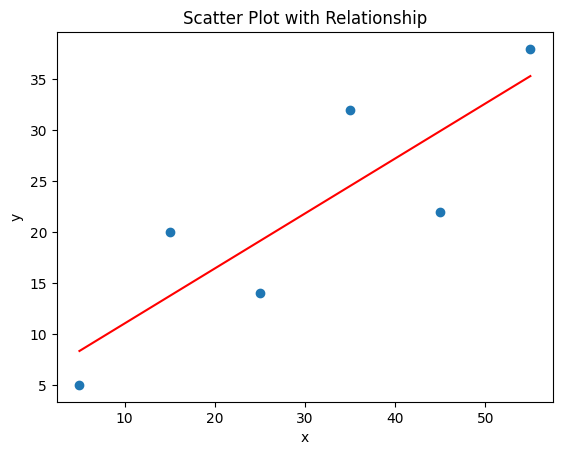

In [40]:
print(RMSE(y_pred,y))
plt.scatter(x.flatten(), y, label = "y")
plt.plot(x.flatten(), y_pred, label = "y_pred", color = "red") #Change between `plot` and `scatter` to see different versions of the graph :)
plt.title('Scatter Plot with Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# MLR

In [42]:
x = [
    [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]
    ]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
x, y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [52]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print("Coefficient of Determination: ", r_sq)
print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)
y_pred = model.predict(x)
print("RMSE: ", RMSE(y, y_pred))

Coefficient of Determination:  0.8615939258756776
Intercept: 5.52257927519819
Coefficients:  [0.44706965 0.25502548]
RMSE:  5.055874980142981


# Polynomial Regression
We now need a class from the `sklearn preprocessing` library. This takes a few arguments:
* `degree` = degree of the polynomial regression function
* `interaction_only` = Decided whether to include only interaction features (True) or all features (False - default)
* `include_bias` = Include column of 1 for intercept (True - default) or not (False)

In [55]:
from sklearn.preprocessing import PolynomialFeatures


We create dummy data and create an instance of the `PolynomialFeatures` class and fit the data to this class.

In [56]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)

PolynomialFeatures(include_bias=False)

Once this is done, we can transform the input array

In [57]:
x_ = transformer.transform(x)

A shortcut to the above would be:

In [62]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_ 

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

As we can see, we now have the polynomial term as expected. We can go ahead and fit the model

In [64]:
model = LinearRegression().fit(x_, y)
r_sq = model.score(x_, y)
print("Coefficient of Determination: ", r_sq)
print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)
y_pred = model.predict(x_)
print("RMSE: ", RMSE(y, y_pred))

Coefficient of Determination:  0.8908516262498563
Intercept: 21.372321428571436
Coefficients:  [-1.32357143  0.02839286]
RMSE:  3.3624325095014753
